In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


2023-01-23 11:56:23.399305: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-23 11:56:34.577441: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-23 11:56:38.115245: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-23 11:56:38.115276: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

2023-01-23 11:57:01.649149: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-23 11:57:01.649343: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-23 11:57:01.649362: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lolol-Yoga-7-15ITL5): /proc/driver/nvidia/version does not exist
2023-01-23 11:57:01.649767: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 9s 19ms/step - loss: 0.3589 - accuracy: 0.8914 - val_loss: 0.0762 - val_accuracy: 0.9788
Epoch 2/15
422/422 [==============================] - 7s 17ms/step - loss: 0.1083 - accuracy: 0.9669 - val_loss: 0.0556 - val_accuracy: 0.9848
Epoch 3/15
422/422 [==============================] - 7s 17ms/step - loss: 0.0827 - accuracy: 0.9745 - val_loss: 0.0508 - val_accuracy: 0.9848
Epoch 4/15
422/422 [==============================] - 7s 17ms/step - loss: 0.0700 - accuracy: 0.9781 - val_loss: 0.0423 - val_accuracy: 0.9885
Epoch 5/15
422/422 [==============================] - 7s 18ms/step - loss: 0.0613 - accuracy: 0.9807 - val_loss: 0.0373 - val_accuracy: 0.9890
Epoch 6/15
422/422 [==============================] - 7s 17ms/step - loss: 0.0547 - accuracy: 0.9829 - val_loss: 0.0324 - val_accuracy: 0.9915
Epoch 7/15
422/422 [==============================] - 7s 18ms/step - loss: 0.0530 - accuracy: 0.9835 - val_loss: 0.0335 - val_accuracy: 0.9907

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)

from keras import backend as K
from keract import get_activations, display_activations


# nodes = 0
# non_zero_nodes = 0

# for n in range(0, len(model.layers)):
#     get_nth_layer_output = K.function([model.layers[0].input], [model.layers[n].output])
#     layer_output = get_nth_layer_output([x_test])[0]
#     nodes += layer_output.size
#     non_zero_nodes += np.count_nonzero(layer_output)


# neuron_coverage = non_zero_nodes / nodes

# print("Neuron coverage:", neuron_coverage)

#******************************************************************************************************************#
#******************************************************************************************************************#
#******************************************************************************************************************#
#******************************************************************************************************************#

def Neuron_Activation_Coverage(model, input_img):
    
    if len(input_img.shape) < 4:
        input_img = np.expand_dims(input_img, axis=0)

    activations = get_activations(model, input_img, auto_compile=True)
    del activations["input_1"]

    total_nodes = 0
    non_zeros = 0
    for value in activations.values():
        total_nodes += value.size
        non_zeros += np.count_nonzero(value)

    return non_zeros / total_nodes

nac = Neuron_Activation_Coverage(model, x_test[0])

print("NAC: ", nac)
    
# [print(k, '->', v.shape, '- Numpy array') for (k, v) in activations.items()]

# display_activations(activations, cmap=None, save=False, directory='.', data_format='channels_last', fig_size=(24, 24), reshape_1d_layers=False)


NAC:  0.2580694044552205


In [12]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.mutation.pm import PolynomialMutation
from pymoo.operators.crossover.sbx import SBX
from pymoo.core.problem import Problem, ElementwiseProblem
from matplotlib import pyplot
import statistics

class NCMax(ElementwiseProblem):
    def __init__(self, input_img):
        super().__init__(
            n_var=784, n_obj=1, n_constr=0, xl=0.0, xu=1.0)
        self.input_img = input_img
    
    def _evaluate(self, x, out, *args, **kwargs):
        x = np.reshape(x, (28, 28, 1))
        perturbed_img = self.input_img + x
        nc = Neuron_Activation_Coverage(model, perturbed_img)
        ret_val = 1.0 / nc
        out["F"] = ret_val

challenging_images = np.zeros(shape=(10000, 28, 28, 1))

alg = NSGA2(pop_size = 30, offsprings=30,
            sampling=FloatRandomSampling(),
            crossovers=SBX(),
            mutation=PolynomialMutation(),)

# test_index = 234

# problem = NCMax(x_test[test_index])

# res = minimize(problem, alg, ("n_gen", 5))

# noise = np.reshape(res.X, (28, 28, 1))

# challenging_img = x_test[test_index] + noise

# nc1 = Neuron_Activation_Coverage(model, x_test[test_index])
# nc2 = Neuron_Activation_Coverage(model, challenging_img)

# print("NAC for normal input: ", nc1)
# print("NAC for challenging input: ", nc2)

for i in range(0, len(x_test) - 9900):
    problem = NCMax(x_test[i])
    
    res = minimize(problem, alg, ("n_gen", 5))
    if res.X.size > 784:
        noise = np.reshape(res.X[0], (28, 28, 1))
    else:
        noise = np.reshape(res.X, (28, 28, 1))

    challenging_img = x_test[i] + noise
    challenging_images[i] = challenging_img

x_test_nacs = []
challenging_images_nacs = []

for i in range(0, 100):
    x_test_nacs.append(Neuron_Activation_Coverage(model, x_test[i]))
    challenging_images_nacs.append(Neuron_Activation_Coverage(model, challenging_images[i]))

nc1 = statistics.fmean(x_test_nacs)
nc2 = statistics.fmean(challenging_images_nacs)

print("NAC for normal input: ", nc1)
print("NAC for challenging input: ", nc2)



NAC for normal input:  0.27239884831035005
NAC for challenging input:  0.46255164923978387


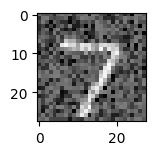

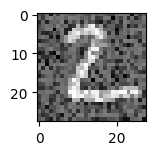

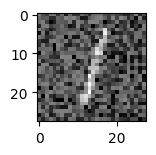

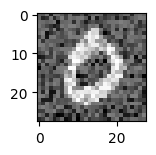

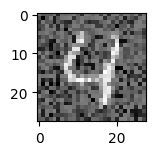

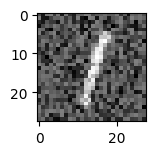

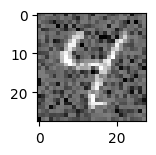

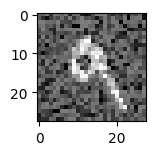

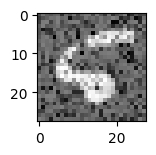

In [13]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(challenging_images[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()